In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_pickle('../../Results/Layer_Boundaries/PlanB/March_22/L23/Boundaries/boundary_l23_03_23_22.pkl')
df2=pd.read_pickle('../../Results/Layer_Boundaries/PlanB/March_22/Normal/Boundaries/boundary_l23_03_23_22.pkl')

In [3]:
df = df1.append(df2, ignore_index=True)
final_result = df.groupby(['animal', 'Layer'], as_index=False)['Layer bottom (um). Origin is top of layer 1'].mean()
final_result.to_pickle('../../Results/Layer_Boundaries/PlanB/March_22/layer_boundary_per_animal.pkl')
final_result.to_excel('../../Results/Layer_Boundaries/PlanB/March_22/layer_boundary_per_animal.xlsx', header=True, index=False)

/tmp/ipykernel_8413/3407272814.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, ignore_index=True)


In [5]:
df

,image,bregma,animal,immunohistochemistry ID,Layer,Layer bottom (um). Origin is top of layer 1,Layer bottom (percentage). Origin is top of layer 1
0,SLD_0000655.vsi - 20x_03,2.95mm,1449920-LeftHemisphere,Nissl_6,Layer 1,151.245420,0.069691
1,SLD_0000655.vsi - 20x_03,2.95mm,1449920-LeftHemisphere,Nissl_6,Layer 3,671.144750,0.309250
2,SLD_0000655.vsi - 20x_03,2.95mm,1449920-LeftHemisphere,Nissl_6,Layer 4,829.565476,0.382247
3,SLD_0000655.vsi - 20x_03,2.95mm,1449920-LeftHemisphere,Nissl_6,Layer 5,1313.106073,0.605052
4,SLD_0000655.vsi - 20x_03,2.95mm,1449920-LeftHemisphere,Nissl_6,Layer 6 a,1830.960017,0.843669
...,...,...,...,...,...,...,...
160,SLD_0000658.vsi - 20x_01,2.15mm,1449920-LeftHemisphere,Nissl_6,Layer 3,468.051139,0.247980
161,SLD_0000658.vsi - 20x_01,2.15mm,1449920-LeftHemisphere,Nissl_6,Layer 4,674.455927,0.357336
162,SLD_0000658.vsi - 20x_01,2.15mm,1449920-LeftHemisphere,Nissl_6,Layer 5,1064.701634,0.564094
163,SLD_0000658.vsi - 20x_01,2.15mm,1449920-LeftHemisphere,Nissl_6,Layer 6 a,1476.853037,0.782457


In [8]:
df = pd.read_csv('../../Results/Layer_Boundaries/PlanB/March_22/Normal/SLD_0000402.vsi - 20x_01 Detections.txt', sep='	|\t', engine='python')
prev_layers = ['Layer 1', 'Layer 2']
df[df.Class.isin(prev_layers)]

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,...,Smoothed: 50 µm: Cluster mean: Delaunay: Max triangle area,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 3 µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 2 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm
65,SLD_0000402.vsi - 20x_01,Layer 2,Layer 2,S1HL,Polygon,10124.8,800.76,267.2281,87.1963,0.4417,...,202.4695,14434.0049,42,1499.8878,91.8856,63.7431,0.0000,394.7499,1200.5151,521.7764
86,SLD_0000402.vsi - 20x_01,Layer 2,Layer 2,S1HL,Polygon,8833.1,1101.30,255.8482,82.3506,0.4741,...,202.4695,14433.9990,47,2005.4875,1.0452,147.4935,0.0000,365.4458,1266.9114,463.4549
90,SLD_0000402.vsi - 20x_01,Layer 1,Layer 1,S1HL,Polygon,8502.3,1003.10,253.8162,77.5060,0.5310,...,202.4694,14434.0020,22,2332.6829,191.3797,0.0000,37.9257,528.5023,1550.0662,685.3495
94,SLD_0000402.vsi - 20x_01,Layer 2,Layer 2,S1HL,Polygon,8380.8,1085.10,251.5437,81.6555,0.4741,...,202.4695,14434.0020,36,2391.8169,146.9113,20.0700,0.0000,499.0236,1578.0260,676.0591
108,SLD_0000402.vsi - 20x_01,Layer 2,Layer 2,S1HL,Polygon,9050.0,942.92,240.8858,80.9661,0.4618,...,202.4695,14433.9941,41,1942.5861,98.3493,58.2926,0.0000,440.0253,1301.8276,562.2930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14420,SLD_0000402.vsi - 20x_01,Layer 1,Layer 1,S1HL,Polygon,9272.4,851.87,6.3440,11.7639,0.5761,...,202.4694,14434.0000,27,1858.0797,127.0826,0.0000,6.4709,482.8069,1313.2906,567.2285
14421,SLD_0000402.vsi - 20x_01,Layer 2,Layer 2,S1HL,Polygon,9676.3,893.32,6.2256,12.4554,0.5043,...,202.4694,14433.9951,58,1591.8667,98.3673,100.3735,0.0000,356.1421,1203.1863,481.3529
14423,SLD_0000402.vsi - 20x_01,Layer 1,Layer 1,S1HL,Polygon,9741.5,756.80,5.8663,11.7648,0.5326,...,202.4695,14433.9980,25,1682.0454,203.0680,0.0000,35.8662,497.2081,1323.7263,607.5830
14429,SLD_0000402.vsi - 20x_01,Layer 2,Layer 2,S1HL,Polygon,10480.9,774.44,5.1480,12.4574,0.4169,...,202.4695,14434.0000,32,1447.4061,68.5733,74.3025,0.0000,489.3830,1136.9922,473.1595


In [10]:
prev_layers = ['Layer 1', 'Layer 2']
inverse_layers = ~df.Class.isin(prev_layers)
df[inverse_layers]

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,...,Smoothed: 50 µm: Cluster mean: Delaunay: Max triangle area,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 3 µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 2 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm
0,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,10163.2,1687.5,511.7038,111.4160,0.5180,...,202.4694,14433.9941,31,661.0261,471.4103,938.4217,759.5811,288.4113,339.1042,0.0000
1,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9818.6,1656.1,507.0367,114.1831,0.4887,...,202.4695,14433.9990,27,894.6273,376.4700,863.5585,672.2461,288.5896,430.5059,0.0000
2,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9731.5,1678.7,462.1395,103.1108,0.5462,...,202.4694,14434.0010,23,942.6561,397.1870,878.8061,685.7734,296.7320,423.3073,0.0000
3,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9783.5,1582.3,435.3223,99.6536,0.5509,...,202.4695,14434.0010,24,972.1765,299.5561,787.1779,593.9706,214.9047,511.8795,0.0000
4,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,10470.8,1654.6,431.6093,98.2666,0.5617,...,202.4695,14434.0020,26,581.1895,366.8183,934.8369,754.6833,326.3247,279.6381,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14427,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,10235.1,1858.3,5.3882,10.3813,0.6283,...,202.4695,14434.0000,39,476.7476,607.0380,1117.7167,942.6359,466.7381,162.2266,0.0000
14428,SLD_0000402.vsi - 20x_01,Layer 3,Layer 3,S1HL,Polygon,9772.3,1244.4,5.2676,9.6880,0.7053,...,202.4695,14433.9990,42,1243.1290,0.0000,449.3893,259.3580,35.3745,839.3776,119.1431
14430,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9599.9,2111.7,5.0287,10.3799,0.5865,...,202.4695,14434.0000,45,842.9559,816.9705,1261.7644,1119.2371,709.9099,13.0662,0.0000
14431,SLD_0000402.vsi - 20x_01,Layer 3,Layer 3,S1HL,Polygon,8573.2,1528.0,4.5491,12.4558,0.3685,...,202.4694,14434.0020,39,2013.5544,0.0000,478.4490,324.7312,31.3462,1154.3788,203.8954


In [11]:
layers_name = ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6 a', 'Layer 6 b']

In [14]:
next_layers_dict = {}
for index, layer in enumerate(layers_name):
    next_layers = layers_name[index+1:]
    next_layers_dict[layer] = next_layers
print(next_layers_dict)

{'Layer 1': ['Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6 a', 'Layer 6 b'], 'Layer 2': ['Layer 3', 'Layer 4', 'Layer 5', 'Layer 6 a', 'Layer 6 b'], 'Layer 3': ['Layer 4', 'Layer 5', 'Layer 6 a', 'Layer 6 b'], 'Layer 4': ['Layer 5', 'Layer 6 a', 'Layer 6 b'], 'Layer 5': ['Layer 6 a', 'Layer 6 b'], 'Layer 6 a': ['Layer 6 b'], 'Layer 6 b': []}


In [43]:
df

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,...,Smoothed: 50 µm: Cluster mean: Delaunay: Max triangle area,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 3 µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 2 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm
0,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,10163.2,1687.50,511.7038,111.4160,0.5180,...,202.4694,14433.9941,31,661.0261,471.4103,938.4217,759.5811,288.4113,339.1042,0.0000
1,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9818.6,1656.10,507.0367,114.1831,0.4887,...,202.4695,14433.9990,27,894.6273,376.4700,863.5585,672.2461,288.5896,430.5059,0.0000
2,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9731.5,1678.70,462.1395,103.1108,0.5462,...,202.4694,14434.0010,23,942.6561,397.1870,878.8061,685.7734,296.7320,423.3073,0.0000
3,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9783.5,1582.30,435.3223,99.6536,0.5509,...,202.4695,14434.0010,24,972.1765,299.5561,787.1779,593.9706,214.9047,511.8795,0.0000
4,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,10470.8,1654.60,431.6093,98.2666,0.5617,...,202.4695,14434.0020,26,581.1895,366.8183,934.8369,754.6833,326.3247,279.6381,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14429,SLD_0000402.vsi - 20x_01,Layer 2,Layer 2,S1HL,Polygon,10480.9,774.44,5.1480,12.4574,0.4169,...,202.4695,14434.0000,32,1447.4061,68.5733,74.3025,0.0000,489.3830,1136.9922,473.1595
14430,SLD_0000402.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,9599.9,2111.70,5.0287,10.3799,0.5865,...,202.4695,14434.0000,45,842.9559,816.9705,1261.7644,1119.2371,709.9099,13.0662,0.0000
14431,SLD_0000402.vsi - 20x_01,Layer 3,Layer 3,S1HL,Polygon,8573.2,1528.00,4.5491,12.4558,0.3685,...,202.4694,14434.0020,39,2013.5544,0.0000,478.4490,324.7312,31.3462,1154.3788,203.8954
14432,SLD_0000402.vsi - 20x_01,Layer 3,Layer 3,S1HL,Polygon,10423.3,1216.70,4.3104,8.9966,0.6692,...,202.4695,14433.9990,42,1018.3026,0.0000,498.2264,315.4110,54.8111,710.2625,54.6162


In [165]:
df = pd.read_csv('../../Results/Layer_Boundaries/PlanB/March_22/Normal/SLD_0000658.vsi - 20x_01 Detections.txt', sep='	|\t', engine='python')


In [135]:
def get_layers_extremity(layer_dataframe, fnc, step=20):
    step = 20
    points = []
    x_min = int(layer_dataframe['Centroid X µm'].min())
    x_max = int(layer_dataframe['Centroid X µm'].max())
    for x_max in range(x_min+step, x_max, step):
        filter_df = layer_dataframe[layer_dataframe['Centroid X µm'] >= x_min]
        filter_df = filter_df[filter_df['Centroid X µm'] < x_max]
        if filter_df.size > 0:
            #index = filter_df['Centroid Y µm'].argmax()
            index = fnc(filter_df['Centroid Y µm'])
            x = filter_df.iloc[index]['Centroid X µm']
            y = filter_df.iloc[index]['Centroid Y µm']
            points.append([x,y])
        x_min = x_max
    points = np.array(points)
    return points


In [138]:
layer_df = df[df.Class == 'Layer 6 b']
points = get_layers_extremity(layer_df, np.argmax)

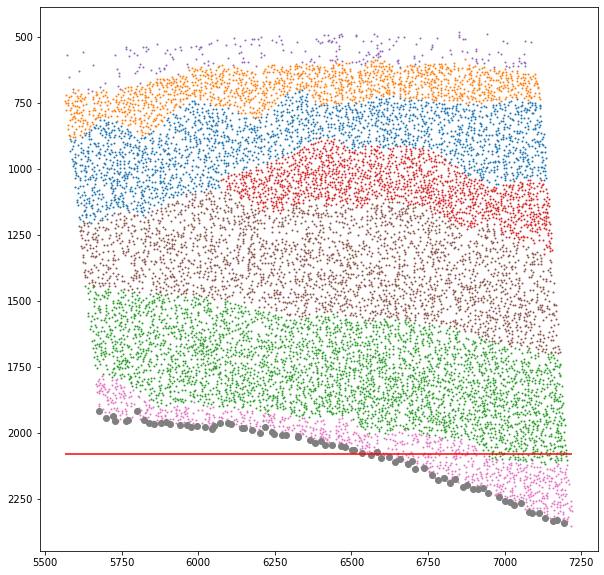

In [139]:
plt.figure(figsize=[10,10])
for layer in set(df.Class):
    layer_df = df[df.Class == layer]
    plt.scatter(layer_df['Centroid X µm'], layer_df['Centroid Y µm'], s=1)
plt.scatter(points[:,0], points[:,1])

plt.hlines(points[:,1].mean(), df['Centroid X µm'].min(), df['Centroid X µm'].max(), color='red')
plt.gca().invert_yaxis()
plt.show()

In [151]:
foo = df[df['Centroid X µm'] == 6809.5]
foo[foo['Centroid Y µm'] == 1456.4]

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,...,Smoothed: 50 µm: Cluster mean: Delaunay: Max triangle area,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 3 µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 2 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm
0,SLD_0000658.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,6809.5,1456.4,403.0341,116.2488,0.3748,...,183.3844,11856.999,35,543.3112,413.2435,851.9102,706.3328,232.8316,133.8175,0.0


In [166]:
df.query("'Centroid X µm' == 6809.5")

TypeError: argument of type 'float' is not iterable

In [156]:
df.query('Centroid X µm == "6809.5" & Centroid Y µm == "1456.4"' )

SyntaxError: invalid syntax (<unknown>, line 1)

In [155]:
import pandas as pd
import numpy as np

length = 100_000
df = pd.DataFrame()
df['Year'] = np.random.randint(1950, 2019, size=length)
df['Gender'] = np.random.choice(['Male', 'Female'], length)

df.query('Gender=="Male" & Year=="2014" ')
df[(df['Gender']=='Male') & (df['Year']==2014)]

,Year,Gender
89,2014,Male
469,2014,Male
495,2014,Male
530,2014,Male
557,2014,Male
...,...,...
99680,2014,Male
99931,2014,Male
99969,2014,Male
99986,2014,Male
